In [1]:
import os
import json
import itertools
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf

from scipy.optimize import curve_fit

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down

In [2]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','3_DOWN')

In [3]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [4]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_3h_2002_2012_npix_3.nc'))
data
lat = data.lat.values
lon = data.lon.values
lon2d, lat2d = np.meshgrid(lon, lat)
Tr = data.Tr.values

Nd3 = data.Nd.values
Cd3 = data.Cd.values
Wd3 = data.Wd.values

Nd3.shape

(11, 25, 30)

In [5]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_3h_2002_2012_npix_5_v2.nc'))

Nd5 = data.Nd.values
Cd5 = data.Cd.values
Wd5 = data.Wd.values

Nd5.shape

(11, 25, 30)

In [6]:
data = xr.open_dataset(os.path.join(dir_base,'VENETO_DOWN_IMERG_3h_2002_2012_npix_7.nc'))

Nd7 = data.Nd.values
Cd7 = data.Cd.values
Wd7 = data.Wd.values

Nd7.shape

(11, 25, 30)

In [7]:
Cmin = np.min([np.nanmin(Cd3),np.nanmin(Cd5),np.nanmin(Cd7)])
Cmax = np.max([np.nanmax(Cd3),np.nanmax(Cd5),np.nanmax(Cd7)])
print(Cmin, Cmax)

5.13446881091071 23.670521210637308


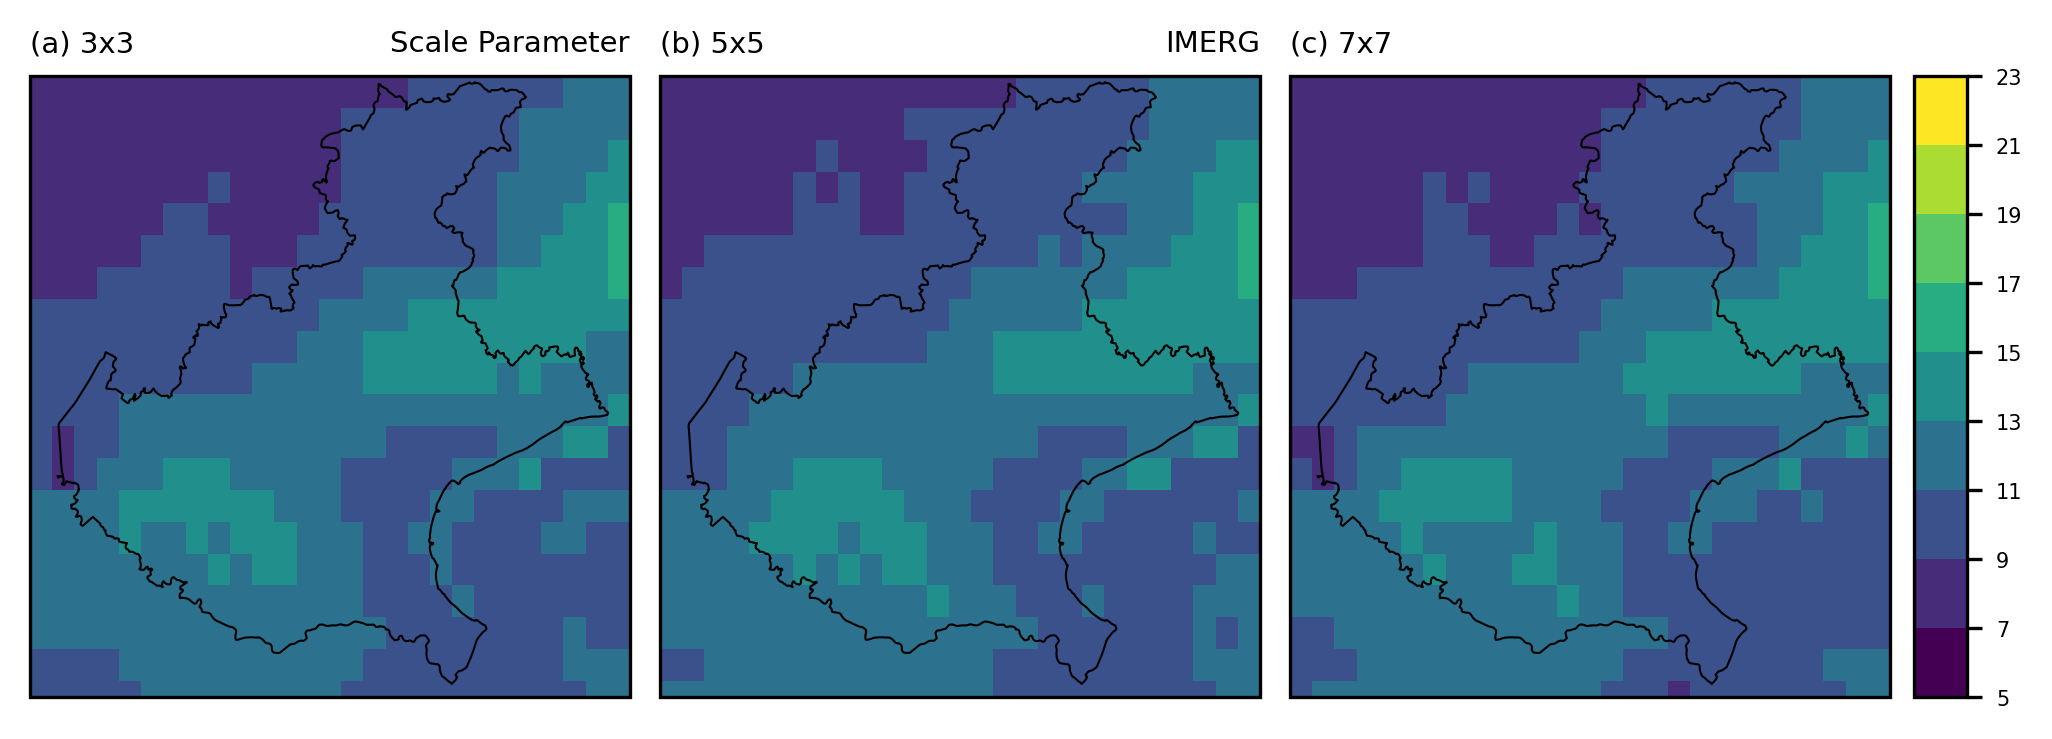

In [31]:
levels_obs = np.arange(int(Cmin),int(Cmax)+2,2)
C_norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Cd3,axis=0), norm=C_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) 3x3', fontsize=7, loc='left')
ax1.set_title(f'Scale Parameter', fontsize=7, loc='right')

# ============================================================================================================================
dif = np.nanmean(Cd7,axis=0)-np.nanmean(Cd5,axis=0)
Cd_update = np.nanmean(Cd5,axis=0)+dif/1.2

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Cd_update, norm=C_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) 5x5', fontsize=7, loc='left')
ax1.set_title(f'IMERG', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Cd7,axis=0), norm=C_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) 7x7', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.15, 0.022, 0.69])#0.91
cbar = plt.colorbar(a1, cax=cbar_ax, ticks= None, orientation='vertical')
cbar.ax.tick_params(labelsize=5)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [9]:
Wmin = np.min([np.nanmin(Wd3),np.nanmin(Wd5),np.nanmin(Wd7)])
Wmax = np.max([np.nanmax(Wd3),np.nanmax(Wd5),np.nanmax(Wd7)])
print(Wmin, Wmax)

0.5117329120596824 1.7293100503546264


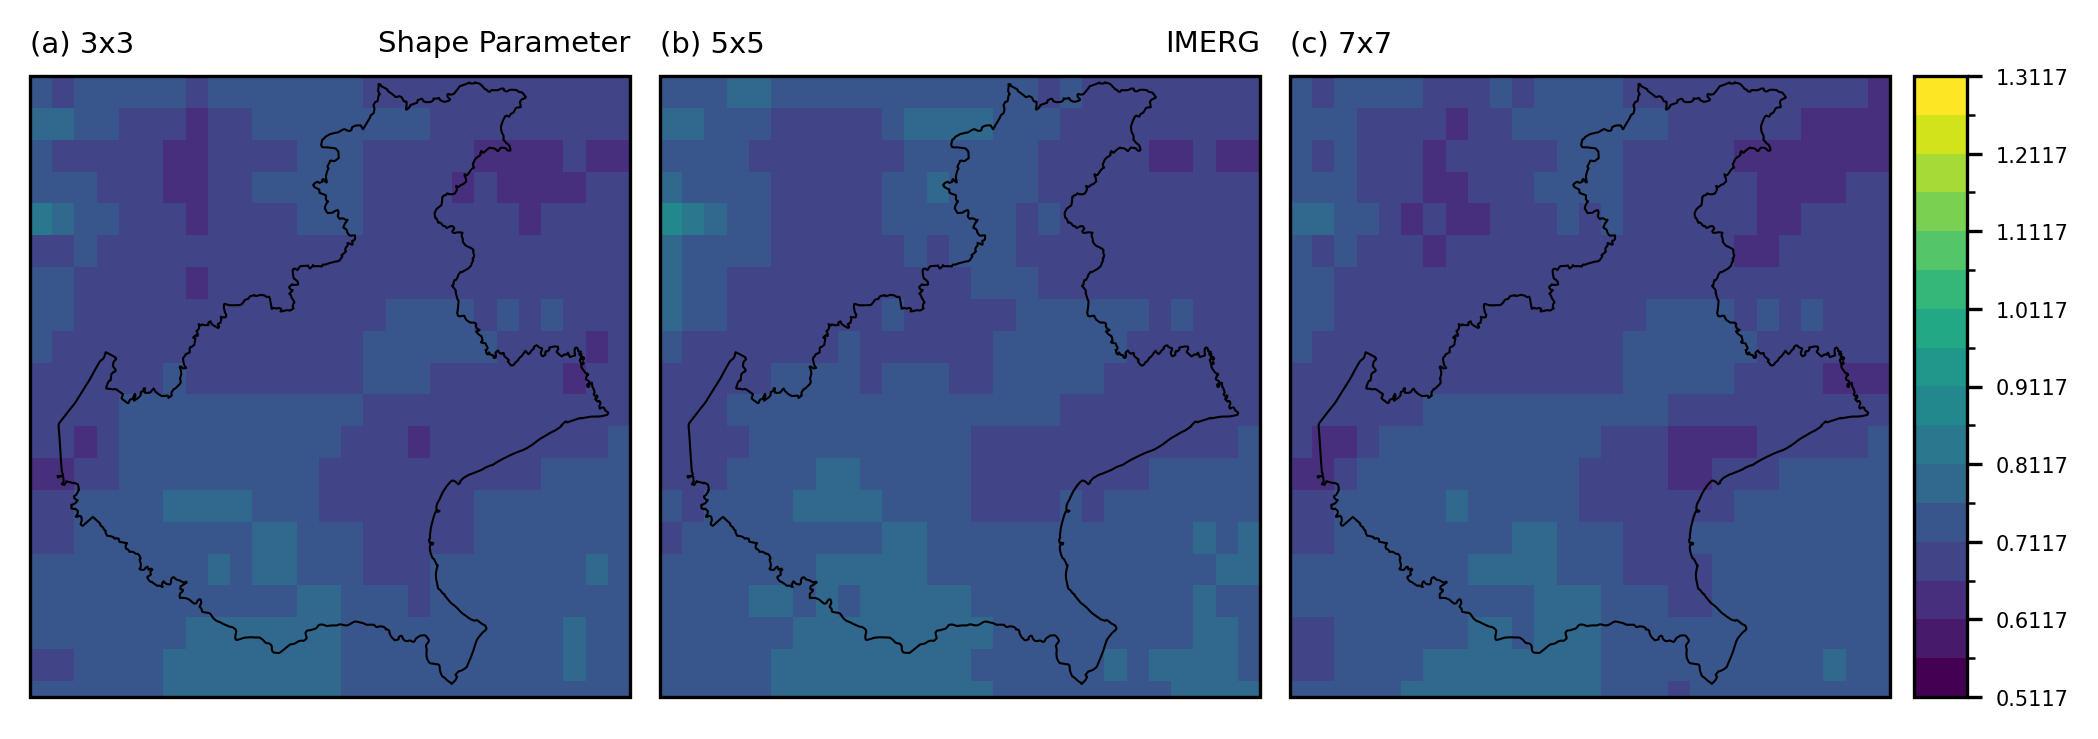

In [35]:
levels_obs = np.arange(Wmin,1.35,0.05)
W_norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Wd3,axis=0), norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) 3x3', fontsize=7, loc='left')
ax1.set_title(f'Shape Parameter', fontsize=7, loc='right')

# ============================================================================================================================
dif = np.nanmean(Wd7,axis=0)-np.nanmean(Wd5,axis=0)
Wd_update = np.nanmean(Wd5,axis=0)+dif/1.2

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Wd_update, norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) 5x5', fontsize=7, loc='left')
ax1.set_title(f'IMERG', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Wd7,axis=0), norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) 7x7', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.15, 0.022, 0.69])#0.91
cbar = plt.colorbar(a1, cax=cbar_ax, ticks= None, orientation='vertical')
cbar.ax.tick_params(labelsize=5)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

## Extreme Quantiles

In [11]:
Tr = [10, 50, 100]

In [12]:
Qd3 = ART_down.pre_quantiles_array(Nd3, Cd3, Wd3, Tr, lat, lon, 1)
Qd5 = ART_down.pre_quantiles_array(Nd5, Cd5, Wd5, Tr, lat, lon, 1)
Qd7 = ART_down.pre_quantiles_array(Nd7, Cd7, Wd7, Tr, lat, lon, 1)

In [13]:
Qmin = np.min([np.nanmin(Qd3[1,:,:]),np.nanmin(Qd5[1,:,:]),np.nanmin(Qd7[1,:,:])])
Qmax = np.max([np.nanmax(Qd3[1,:,:]),np.nanmax(Qd5[1,:,:]),np.nanmax(Qd7[1,:,:])])
print(Wmin, Wmax)

0.5117329120596824 1.7293100503546264


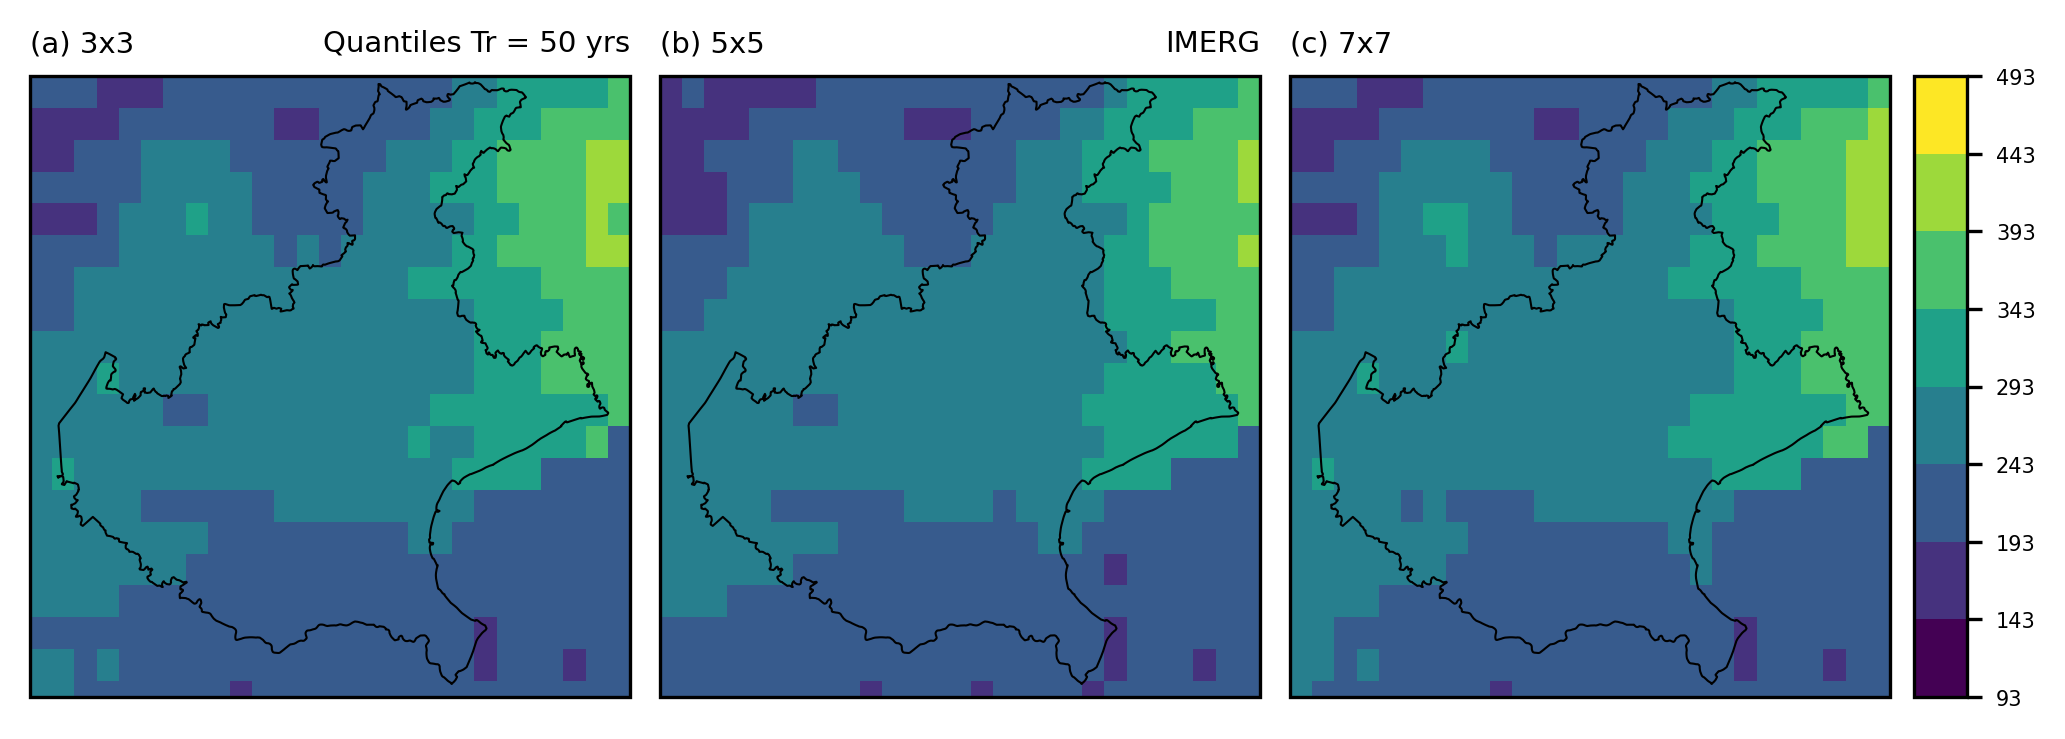

In [25]:
levels_obs = np.arange(int(Qmin),int(Qmax)+50,50)
W_norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd3[1,:,:], norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) 3x3', fontsize=7, loc='left')
ax1.set_title(f'Quantiles Tr = 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
dif = Qd7[1,:,:]-Qd5[1,:,:]
Qd5_update = Qd5[1,:,:]+dif/1.2

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd5_update, norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) 5x5', fontsize=7, loc='left')
ax1.set_title(f'IMERG', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd7[1,:,:], norm=W_norm)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) 7x7', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.15, 0.022, 0.69])#0.91
cbar = plt.colorbar(a1, cax=cbar_ax, ticks= None, orientation='vertical')
cbar.ax.tick_params(labelsize=5)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

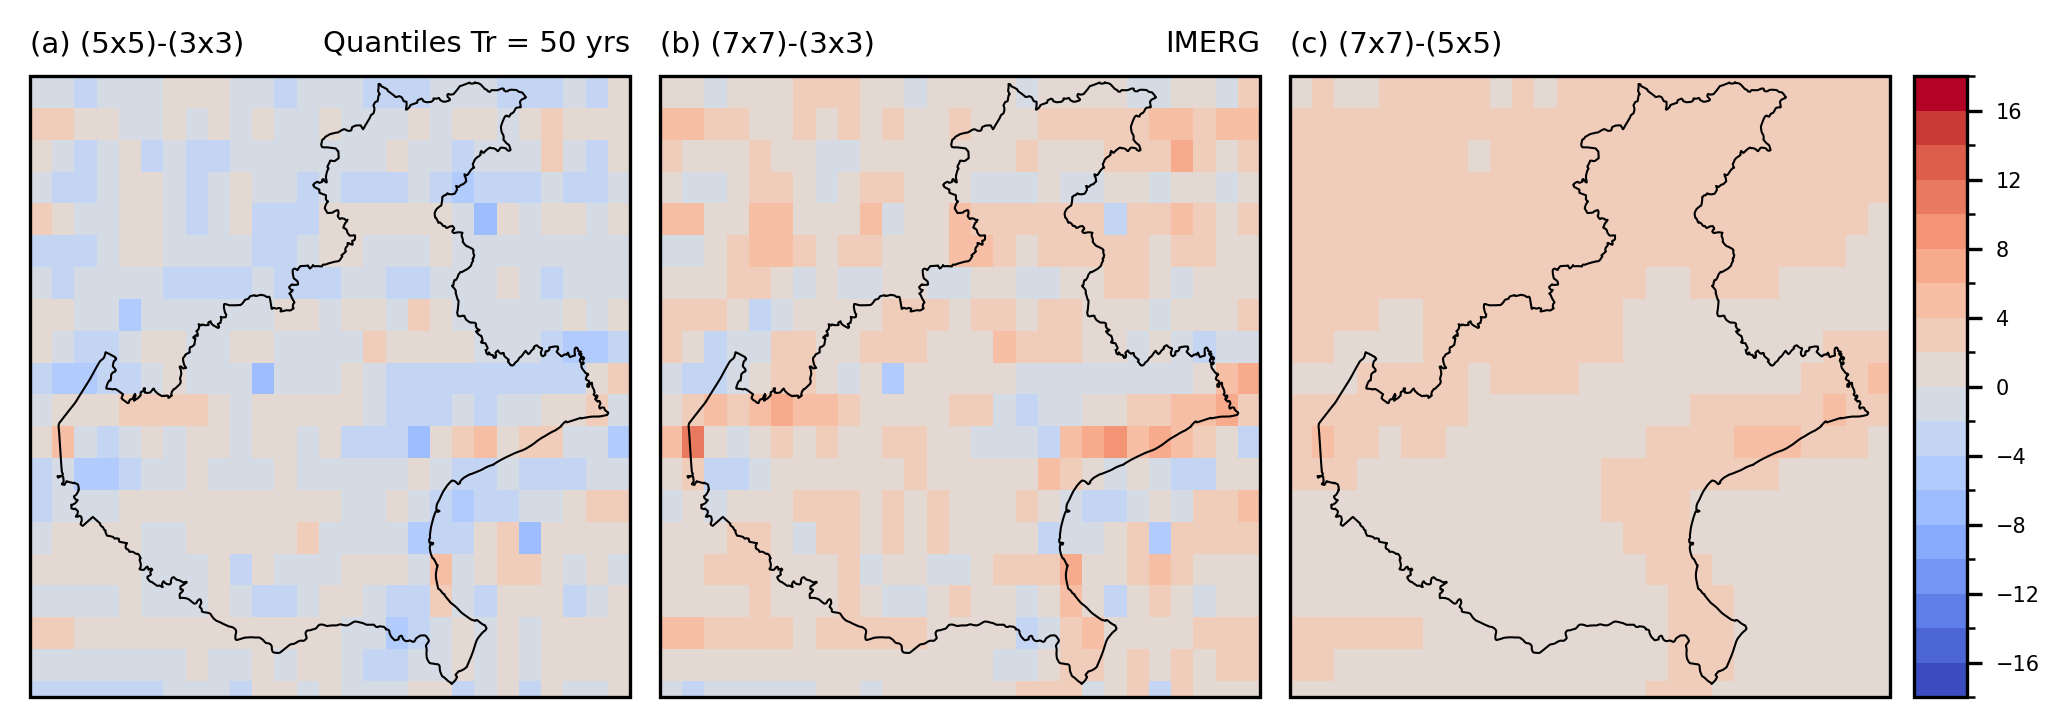

In [ ]:
levels_obs = np.arange(-18,18+2,2)
W_norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)

cmap = plt.cm.coolwarm
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd5_update-Qd3[1,:,:], norm=W_norm, cmap=cmap)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) (5x5)-(3x3)', fontsize=7, loc='left')
ax1.set_title(f'Quantiles Tr = 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
dif = Qd7[1,:,:]-Qd5[1,:,:]
Qd5_update = Qd5[1,:,:]+dif/1.05

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd7[1,:,:]-Qd3[1,:,:], norm=W_norm, cmap=cmap)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) (7x7)-(3x3)', fontsize=7, loc='left')
ax1.set_title(f'IMERG', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)

a1 = ax1.pcolormesh(lon2d, lat2d, Qd7[1,:,:]-Qd5_update, norm=W_norm, cmap=cmap)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
# cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) (7x7)-(5x5)', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.91, 0.15, 0.022, 0.69])#0.91
cbar = plt.colorbar(a1, cax=cbar_ax, ticks= None, orientation='vertical')
cbar.ax.tick_params(labelsize=5)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [51]:
dif_5_3 = Qd5_update-Qd3[1,:,:]
dif_7_3 = Qd7[1,:,:]-Qd3[1,:,:]
dif_7_5 = Qd7[1,:,:]-Qd5_update

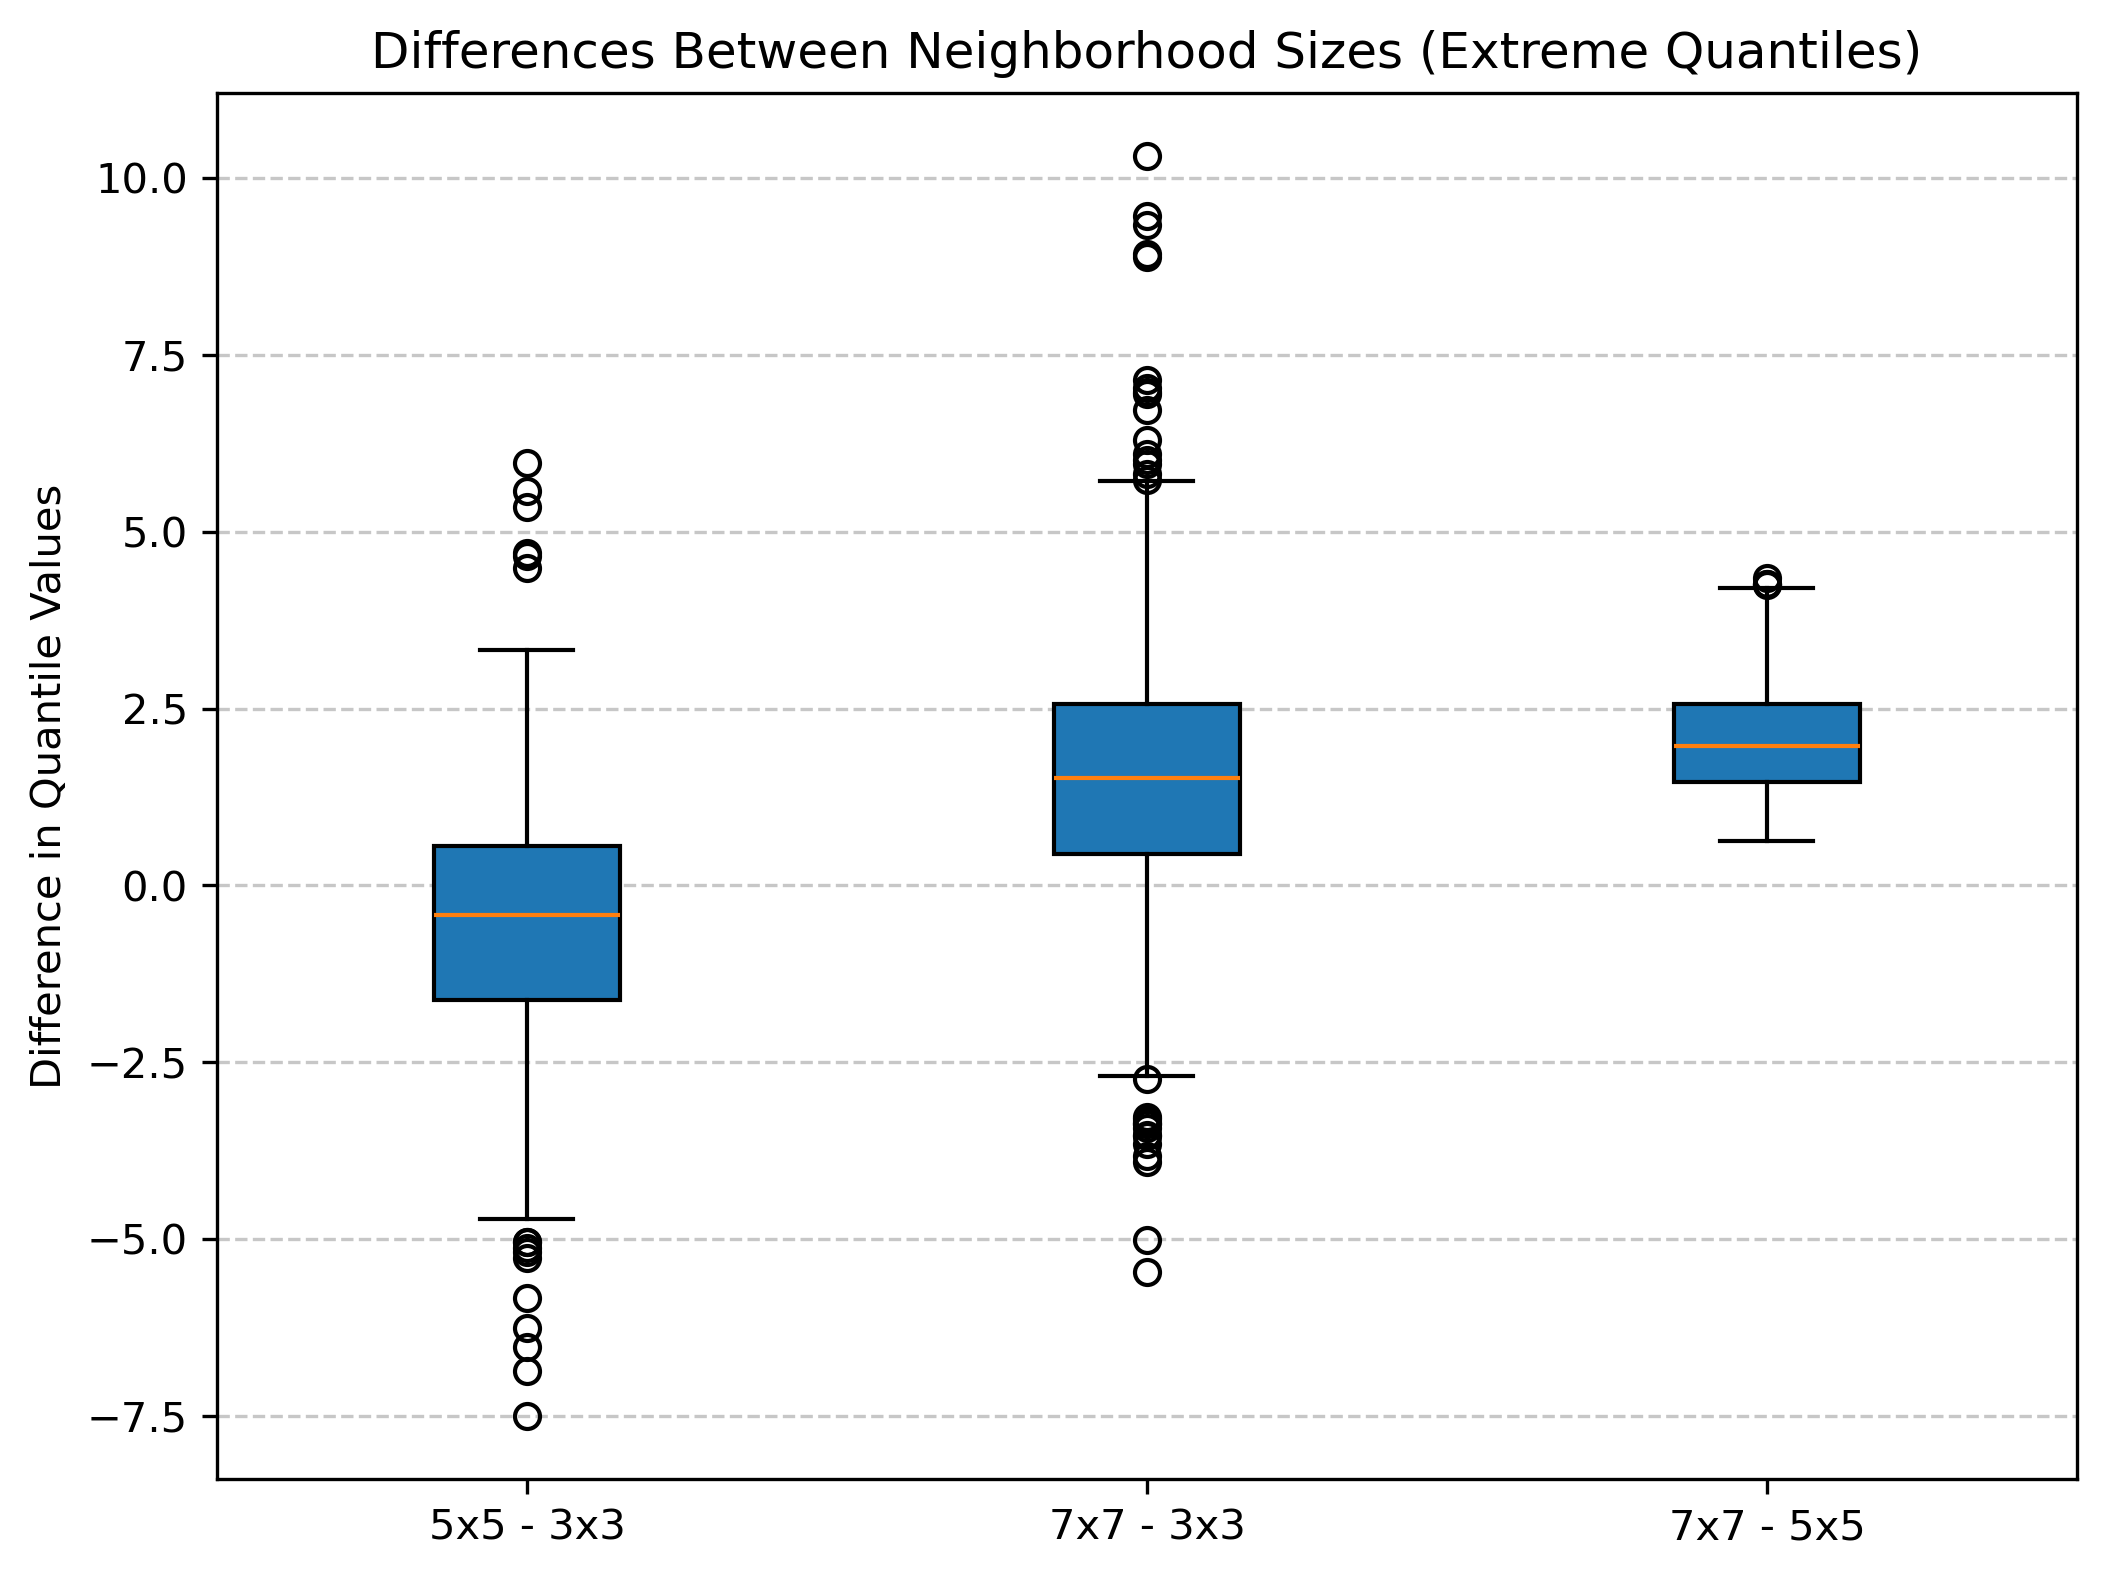

In [57]:
# Asegúrate de aplanar los arrays para el boxplot
data = [
    (Qd5_update - Qd3[1, :, :]).ravel(),
    (Qd7[1, :, :] - Qd3[1, :, :]).ravel(),
    (Qd7[1, :, :] - Qd5_update).ravel()
]

labels = ['5x5 - 3x3', '7x7 - 3x3', '7x7 - 5x5']

fig = plt.figure(figsize=(8,6),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.boxplot(data, labels=labels, patch_artist=True)

ax1.set_title('Differences Between Neighborhood Sizes (Extreme Quantiles)')
ax1.set_ylabel('Difference in Quantile Values')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)